In [42]:
# NOAA GML DATA - CO2 monthly average globally

url='https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_gl.txt'

# local data
f='../data_external/co2.txt'

In [43]:
# downloading data

import os
import urllib
import shutil

if not os.path.isdir('../data_external/'):
    os.mkdir('../data_external/')

r = urllib.request.urlopen(url)
fo = open(f, 'wb')
shutil.copyfileobj(r, fo)
fo.close()

In [44]:
# opening the data

lines = open(f, 'r').readlines()

In [45]:
time=[] ; avg=[]

In [46]:
# munging the data to get the data into arrays

for line in lines:
    if line.startswith('#') or len(line.strip())==0:
        continue  # skipping comments and empty lines

    data=line.split()

    time.append(float(data[2]))
    avg.append(float(data[3]))

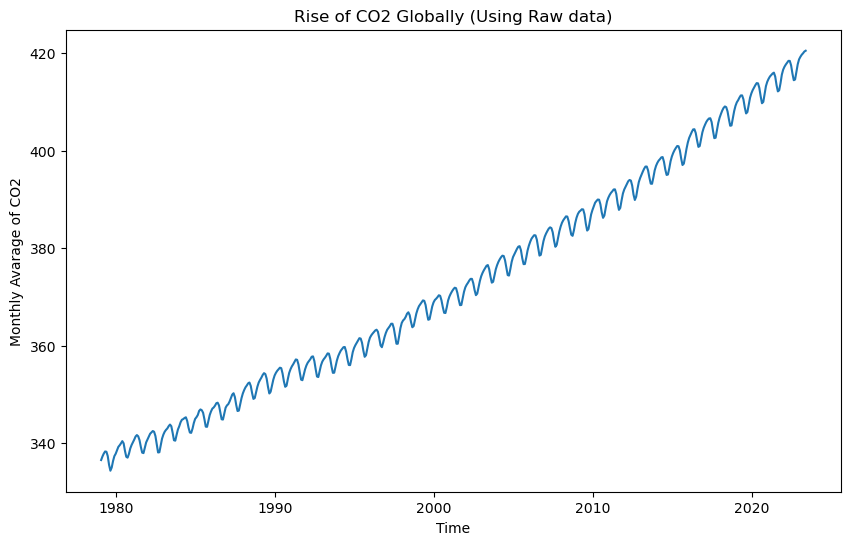

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(time,avg)
plt.xlabel('Time')
plt.ylabel('Monthly Avarage of CO2')

plt.title('Rise of CO2 Globally (Using Raw data)')

plt.show()

The data is not equispaced, that is why we are getting little messy graph. We need to interpolate the data.

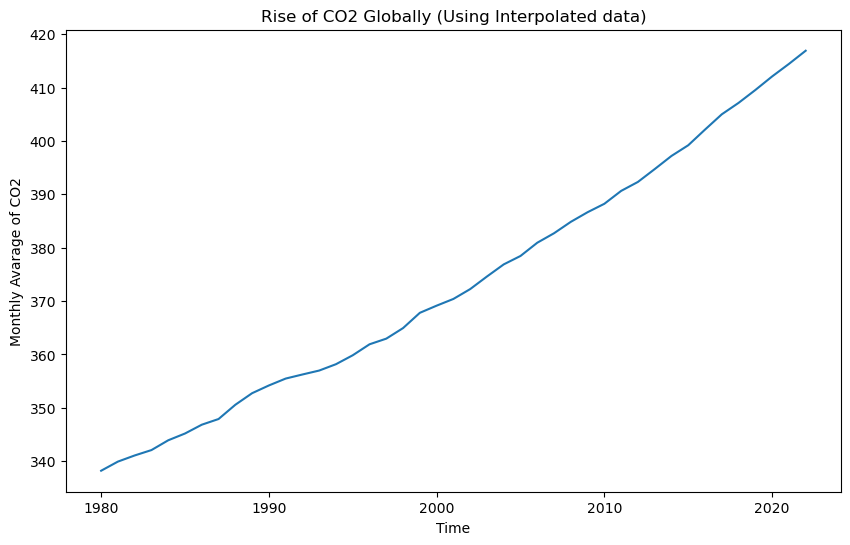

In [48]:
from scipy.interpolate import interp1d
import numpy as np

f_linear = interp1d(time,avg)   # interpolating data linearly using scipy.interpolate

x=np.arange(1980,2023)      # creating equispaced time intervals from 1980 to 2023
y=f_linear(x)             # evaluating at those equispaced time intervals

plt.figure(figsize=(10,6))

plt.xlabel('Time')
plt.ylabel('Monthly Avarage of CO2')

plt.title('Rise of CO2 Globally (Using Interpolated data)')

plt.plot(x,y)
plt.show()

Clearly we can see global CO2 avarage rised very much over time (from 1980 to 2023). This is due to our growth in industry, increased amount of vehicles, deforestation etc.

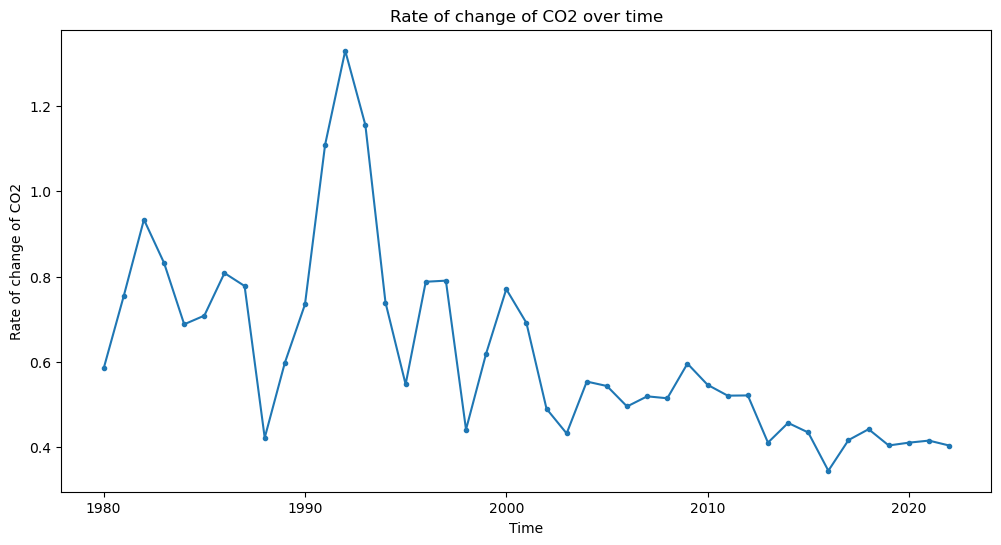

In [49]:
rate_of_change=np.gradient(x,y)     # Getting rate of change of CO2 from this interpolated data

plt.figure(figsize=(12,6))

plt.plot(x,rate_of_change, marker='.')
plt.xlabel('Time')
plt.ylabel('Rate of change of CO2')
plt.title('Rate of change of CO2 over time')

plt.show()

The rate of increase in CO2 was at top between 1990-1995. And rate of increase in CO2 is declined after 2000 and lowest from 2017 onwards. This is probably due to fact that we are getting aware about global warming and we are trying to prevent global warming.